<h1><center>Reconstructing HPGe Detector Waveform Energy</center></h1>

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
waveforms = pd.read_csv('HPGeData.csv')
waveforms

,Max_Amp,tDrift50,tDrift90,tDrift100,blnoise,tslope,Energy
0,1233.0,61.0,69.0,81.0,11.5110,-108.1349,461.6230
1,1319.0,93.0,116.0,135.0,3.7505,-112.9078,510.6010
2,1237.0,81.0,89.0,104.0,2.3472,-111.2230,463.7562
3,4469.0,90.0,98.0,112.0,1.8966,-111.4219,1754.7053
4,796.0,84.0,95.0,117.0,2.9256,-123.4542,271.7369
...,...,...,...,...,...,...,...
395,1612.0,33.0,44.0,61.0,1.6828,-112.4374,582.6840
396,561.0,61.0,69.0,99.0,1.8116,-110.4882,209.8814
397,459.0,73.0,87.0,101.0,3.8790,-109.1862,165.7746
398,1091.0,43.0,51.0,68.0,1.9427,-113.4403,402.6300


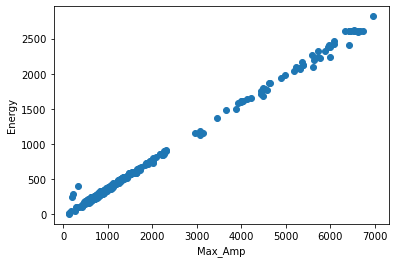

In [3]:
plt.scatter(waveforms['Max_Amp'], waveforms['Energy'])
plt.xlabel('Max_Amp')
plt.ylabel('Energy')
plt.show(block=True)

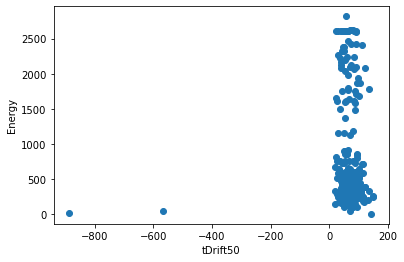

In [4]:
plt.scatter(waveforms['tDrift50'], waveforms['Energy'])
plt.xlabel('tDrift50')
plt.ylabel('Energy')
plt.show(block=True)

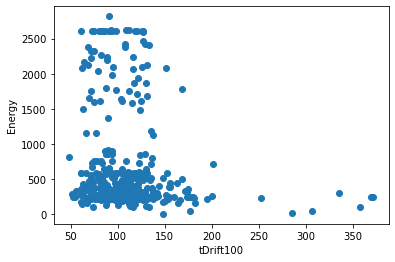

In [5]:
plt.scatter(waveforms['tDrift100'], waveforms['Energy'])
plt.xlabel('tDrift100')
plt.ylabel('Energy')
plt.show(block=True)

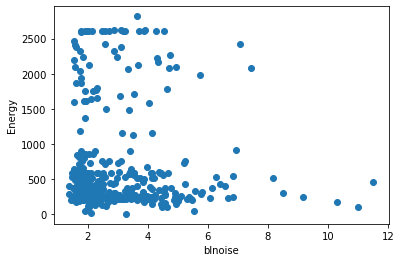

In [6]:
plt.scatter(waveforms['blnoise'], waveforms['Energy'])
plt.xlabel('blnoise')
plt.ylabel('Energy')
plt.show(block=True)

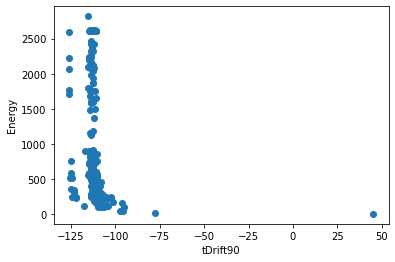

In [7]:
plt.scatter(waveforms['tslope'], waveforms['Energy'])
plt.xlabel('tDrift90')
plt.ylabel('Energy')
plt.show(block=True)

In [8]:
waveforms = pd.read_csv('HPGeData.csv')
for x in waveforms.index:
    if waveforms.loc[x, 'Energy'] > waveforms.loc[x, 'Max_Amp']:
        waveforms.drop(x, inplace = True)
waveforms

,Max_Amp,tDrift50,tDrift90,tDrift100,blnoise,tslope,Energy
0,1233.0,61.0,69.0,81.0,11.5110,-108.1349,461.6230
1,1319.0,93.0,116.0,135.0,3.7505,-112.9078,510.6010
2,1237.0,81.0,89.0,104.0,2.3472,-111.2230,463.7562
3,4469.0,90.0,98.0,112.0,1.8966,-111.4219,1754.7053
4,796.0,84.0,95.0,117.0,2.9256,-123.4542,271.7369
...,...,...,...,...,...,...,...
395,1612.0,33.0,44.0,61.0,1.6828,-112.4374,582.6840
396,561.0,61.0,69.0,99.0,1.8116,-110.4882,209.8814
397,459.0,73.0,87.0,101.0,3.8790,-109.1862,165.7746
398,1091.0,43.0,51.0,68.0,1.9427,-113.4403,402.6300


In [9]:
def solve_normal_equations(X, y):
    '''Returns the optimal parameter vector, w*, given a design matrix X and observation vector y.'''
    return np.linalg.solve(X.T @ X, X.T @ y)


In [10]:
def predict(row):
    '''Function that returns the predicted energy for a given row of the waveform features
    row will be a 1-d array of [Max_Amp, tDrift50, tDrift90, tDrift100, blnoise, tslope]
    please change the return 0 to return predicted energy given these parameters
    '''
    return (features[0] + row['Max_Amp'] * features[1])

In [11]:
def calculate_MSE(df):
    '''Compute MSE of the predictions corresponding to each row of the given dataframe'''
    n = df.shape[0]
    total_squared_error = 0
    for i in np.arange(n):
        predicted = predict(df.iloc[i].drop("Energy"))
        actual = df.iloc[i].get('Energy')
        squared_error = (actual - predicted)**2
        total_squared_error += squared_error
    return total_squared_error/n

In [12]:
waveforms['1'] = 1
X_one_feature_model = waveforms [['1', 'Max_Amp']].values
y = waveforms['Energy']

features = solve_normal_equations(X_one_feature_model, y)
features

array([-39.80185391,   0.40323218])

In [13]:
# An example prediction
example_row = waveforms.iloc[0].drop("Energy")
predict(example_row)

457.3834220612997

In [14]:
print(calculate_MSE(waveforms))

541.4740970666645
